y=-57.03584315644333-20.746140911397724*log10(x)
-122dBm at 1353m
-132dBm at 4105m


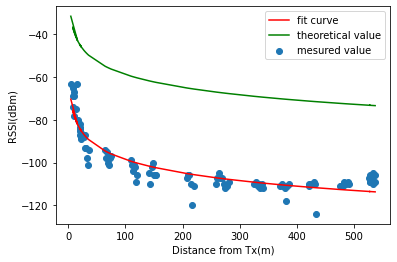

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# lon0, lat0 = 35.650798, 139.779477
lon0, lat0 = 38.721527, 141.092104
r = 6378.137*1000
data_path='data/data_6_16_2.csv'
data = pd.read_csv(data_path, names=['RSSI','LONGITUDE', 'LATITUDE'], sep=',')

data['DISTANCE'] = r*np.arccos(np.sin(lat0*np.pi/180)*np.sin(data['LATITUDE']*np.pi/180)+np.cos(lat0*np.pi/180)*np.cos(data['LATITUDE']*np.pi/180)*np.cos(lon0*np.pi/180-data['LONGITUDE']*np.pi/180))

x=data[['DISTANCE']]
y=data[['RSSI']]

def func(x, a, b):
    return a + b * np.log10(x)

def func_theory(x):
    return 13 - 20*np.log10(4*np.pi*x*921.2*10**6/299792458)

x = x.to_numpy()[:, 0]
y = y.to_numpy()[:, 0]

y_theory = func_theory(x)

popt, pcov = curve_fit(func,x,y) 
print("y="+str(popt[0])+str(popt[1])+"*log10(x)")
y_pred = func(x, popt[0], popt[1])
plt.plot(x,y_pred,color="red")
plt.plot(x,y_theory,color="green")

plt.scatter(x,y)
plt.xlabel("Distance from Tx(m)")
plt.ylabel("RSSI(dBm)")
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
# plt.legend(["simulation","measured value","linear regression of measured value"])
plt.legend(["fit curve","theoretical value","mesured value"])
print("-122dBm at "+str(int(np.exp((-122+57.035530363980186)/(-9.009988560782537))))+"m")
print("-132dBm at "+str(int(np.exp((-132+57.035530363980186)/(-9.009988560782537))))+"m")